In [1]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### 1 task

In [29]:
def generate(n):
    return ss.cauchy(scale=5.65).rvs(size=n)

data = generate(1000000)
q1, q2, q3 = ss.mstats.mquantiles(data, prob=[0.25, 0.5, 0.75])
print("Scale estimation:", (q3-q1)/2)

Scale estimation: 5.645424377952048


##### 2 task

In [58]:
import numpy as np

def weighted_corr(sample: np.array, weights: np.array) -> float:
    def weighted_mean(x, w):
        return np.average(x, weights=w)
    
    def weighted_cov(x, y, w):
        return np.average((x - weighted_mean(x, w)) * (y - weighted_mean(y, w)), weights=w)

    x = sample[:, 0]
    y = sample[:, 1]
    weighted_corr_val = weighted_cov(x, y, weights) / np.sqrt(weighted_cov(x, x, weights) * weighted_cov(y, y, weights))
    print(weighted_corr_val)
    return weighted_corr_val
    # sample.shape = (n, 2)



(1000000, 2)

In [32]:
sample = np.array([[1,2,3], [4,5,6]]).T
sample.shape
sample[:, 0]

array([1, 2, 3])

##### 3 task

0.4744887900517019 0.5244397890434386
0.24590225134478924


(0.023, 0.023)

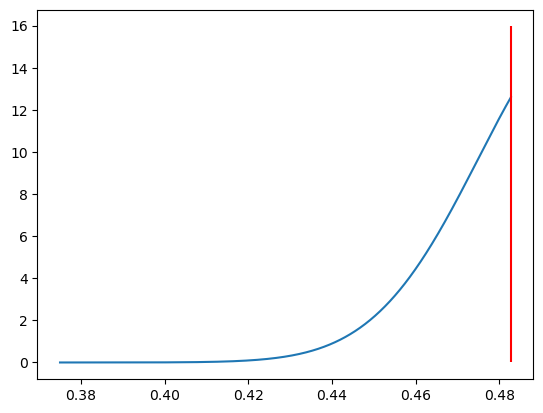

In [47]:
def exact(q, n):
    loc = 1/q
    scale = 1/(n*q**2)
    normal_distribution = ss.norm(loc=loc, scale=scale)
    x_min = loc - 5*scale
    x_max = loc + 5*scale
    arr = np.linspace(x_min, x_max, 10000)
    norm_pdf = normal_distribution.pdf(arr)
    sample = normal_distribution.rvs(1000)
    
    mean = sample.mean()
    std = np.sqrt(1/q**2)
    
    edge_min = sample.mean() - 2 * sample.std()/np.sqrt(n)
    edge_max = sample.mean() + 2 * sample.std()/np.sqrt(n)
    print(sample.mean() - 3 * sample.std()/np.sqrt(n), sample.mean() + 3 * sample.std()/np.sqrt(n))

    max_array = np.linspace(edge_max, x_max, 1000)
    min_array = np.linspace(x_min, edge_min, 1000)
    integral = np.trapz(x=min_array, y=normal_distribution.pdf(min_array))
    print(integral)
    
    
    plt.plot(min_array, normal_distribution.pdf(min_array))
    plt.vlines(edge_min, ymin=0, ymax=max(norm_pdf), color='r')
    return 0.023, 0.023


exact(2,10)